In [ ]:
# To train the CSHMM-TF model you need to initialize the structure with scdiff first
# uncomment the following codes and execute for generating the initialization file for lung dataset:
#----------------------
#import scdiff_init
#tfdna="tfDNA_predicted_100.txt.update"
#scdiff_init.run_scdiff_init("treutlein2014",tfdna,large=None) #if it takes too long, set large="True" for large dataset
#----------------------
#note that after it finished a file "init_cluster_treutlein2014.txt" will be generated


In [ ]:
# after the model initialization, you need to run the training script "run_TF.sh"
# basically, it specified the required arguments to the training python file and 
# will generate model file and training log file for lung dataset
# the content of the script is as follows:
#--------------------------------
# export OMP_NUM_THREADS=4
# python CSHMM_TF_train_release.py \
# --data_file treutlein2014 \
# -tf tfDNA_predicted_100.txt.update \
# --structure_file init_cluster_treutlein2014.txt \
# --n_split 100 -ng 16000 \
# --n_iteration 10 \
# --cross_validation 0 \
# --random_seed 5 \
# -k 10 \
# -opt genlasso \
# --model_name lung_developmental_TF_v7 \
# >>  lung_developmental_TF_v7.log 2>&1 
#---------------------------------
# use --data_file to specify the data file
# use -tf to specify the TF-target file, note that if you don't specify this, then the model will train without assigning TFs to each path
# use --structure_file to specify the file for initial structure generated by SCDIFF
# use --n_split to specify how many time points you want to sample when assigning cells to each path
# use -ng to specify the maximum number of genes you want to use during training, if ng is less the dimension of the data,
#     then the genes with most variance will be used.
# use --n_iteration to specify how many epoch you want to train
# use --random_seed to change the random_seed
# use -k to specify the max value of the parameter for gene changing speed
# use -opt to specify the optimizer when solving for the convex optimization for mean gene parameter of split nodes.
# use --model_name to specify the output model name


In [ ]:
# after you finished the training (it will take a while), you will see some .pickle are generated for each epoch
# each of these file is the model file that is a python dictionary stores the model parameter and cell/TF assignments
# you can use the following codes to generate the result as in the CSHMM-TF paper


In [1]:
import CSHMM_TF_analysis_release as ANA
import CSHMM_TF_train_release as ML
from scipy.stats import hypergeom

%matplotlib inline


plotting path figure for model file:  lung_developmental_TF_v7_it10.pickle
loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
structure.png


/usr0/home/chiehl1/venv/local/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


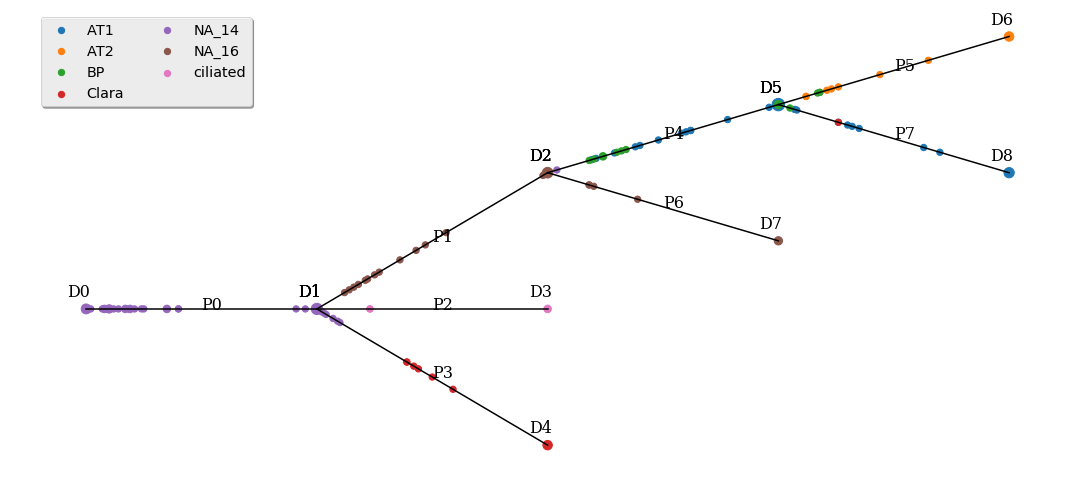

In [2]:
#plot the learned structure and cell assignment for lung dataset
data_file="treutlein2014"
model_file = "lung_developmental_TF_v7_it10.pickle"
ANA.plot_path_fig(model_file,data_file,circle_size=40,change_label=True)
#change_label option marks NA cell types with their time

In [3]:
#plot the learned TF assignment for lung dataset
df=ANA.print_continuous_TF(model_file,pcut=0.1,print_no_gene=False,print_no_show=False)

loading model from file:  lung_developmental_TF_v7_it10.pickle
#########################################
path:  0
TF_no_gene:  0
TF_no_gene_pv:  0
TF_no_show:  0
TF_no_show_pv:  0
top 10 expressed TF
 # top 10 expressed TF:  0
#########################################
path:  1
TF_no_gene:  12
TF_no_gene_pv:  12
TF_no_show:  31
TF_no_show_pv:  31
top 10 expressed TF
	yy1 	0.0 	2.481439858037504e-06 	path_parent_pv_cutoff_0.05_FC_cutoff_0.6
	e2f4 	0.0 	8.559366252214318e-05 	path_parent_pv_cutoff_0.05_FC_cutoff_1.0
	atf2 	0.0 	9.391624439003543e-05 	path_parent_pv_cutoff_0.05_FC_cutoff_0.6
	e2f1 	0.0 	0.00011598232783083251 	path_parent_pv_cutoff_0.05_FC_cutoff_1.0
	e2f3 	0.0 	0.000353182646842809 	path_parent_pv_cutoff_0.05_FC_cutoff_1.0
	xbp1 	0.0 	0.0011451173195149433 	path_parent_pv_cutoff_0.05_FC_cutoff_0.6
	creb1 	0.1 	1.0764151443631853e-05 	path_parent_pv_cutoff_0.05_FC_cutoff_1.0
	atf7 	0.1 	0.0005636743852638348 	path_parent_pv_cutoff_0.05_FC_cutoff_0.6
	crem 	0.1 	0.001068185

In [4]:
#save the tf assignment table to csv file
df.to_csv("lung_TF_assignment.csv")

loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
path:  1
selecting genes:  yy1	atf2	atf7	creb1
TF:  yy1
TF:  atf2
TF:  atf7
TF:  creb1


/usr0/home/chiehl1/venv/local/lib/python2.7/site-packages/matplotlib/pyplot.py:504: UserWarning: close('all') closes all existing figures
  warnings.warn("close('all') closes all existing figures")


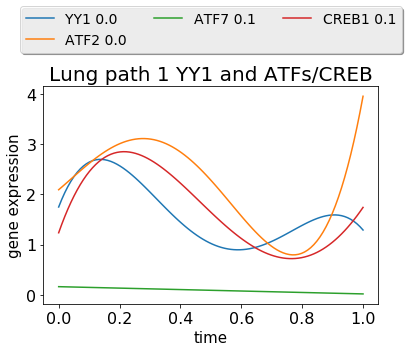

loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
path:  1
selecting genes:  yy1	e2f1	e2f3	e2f4
TF:  yy1
TF:  e2f1
TF:  e2f3
TF:  e2f4


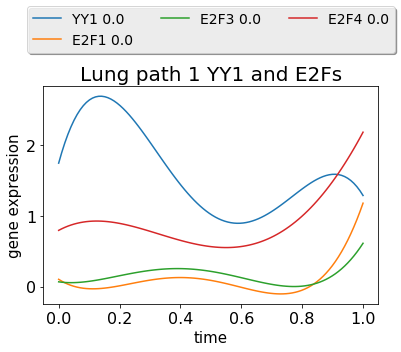

loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
path:  2
selecting genes:  cebpb	cebpd
TF:  cebpb
TF:  cebpd


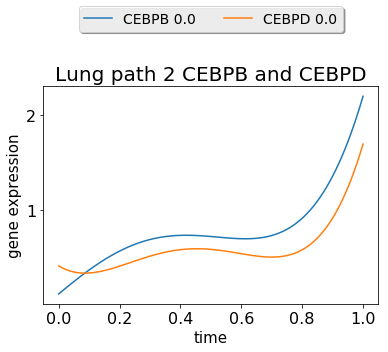

loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
path:  4
selecting genes:  tfdp1	e2f4	e2f7	e2f2	e2f5	e2f3
TF:  tfdp1
TF:  e2f4
TF:  e2f7
TF:  e2f2
TF:  e2f5
TF:  e2f3


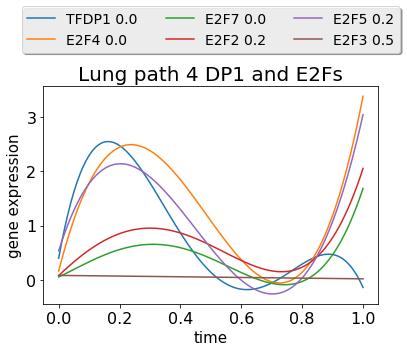

In [5]:
#plot selected TF expression for lung dataset
data_file="treutlein2014"
model_file = "lung_developmental_TF_v7_it10.pickle" # run_TF.sh naming error, updated
ANA.plot_cont_TF(model_file,data_file,select=[[1],"yy1","atf2","atf7","creb1"],title="Lung path 1 YY1 and ATFs/CREB")
ANA.plot_cont_TF(model_file,data_file,select=[[1],"yy1","e2f1","e2f3","e2f4"],title="Lung path 1 YY1 and E2Fs")
ANA.plot_cont_TF(model_file,data_file,select=[[2],"cebpb","cebpd"],title="Lung path 2 CEBPB and CEBPD")
ANA.plot_cont_TF(model_file,data_file,select=[[4],"tfdp1","e2f4","e2f7","e2f2","e2f5","e2f3"],title="Lung path 4 DP1 and E2Fs")

#select is the parameter for selecting path and genes of interest, format a list: [[path ids], gene1, gene2, ...]
#if path is selected but no genes are selected, then it will plot the expression of all TFs in the path
#if select is None, then it will plot the expression of all TFs for every path

loading model from file:  neuron_developmental_TF_v7_it10.pickle
loading data......
252  cell loaded with  11835  genes selected
path:  1
selecting genes:  jun	fos
TF:  jun
TF:  fos


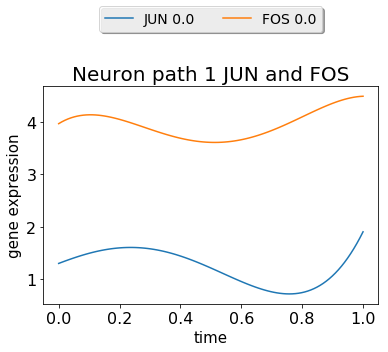

loading model from file:  neuron_developmental_TF_v7_it10.pickle
loading data......
252  cell loaded with  11835  genes selected
path:  1
selecting genes:  jun	fosl1
TF:  jun
TF:  fosl1


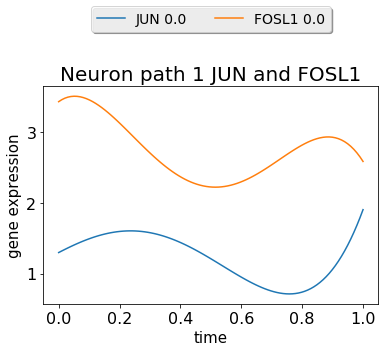

loading model from file:  neuron_developmental_TF_v7_it10.pickle
loading data......
252  cell loaded with  11835  genes selected
path:  2
selecting genes:  tfdp1	e2f1	e2f4	e2f3
TF:  tfdp1
TF:  e2f1
TF:  e2f4
TF:  e2f3


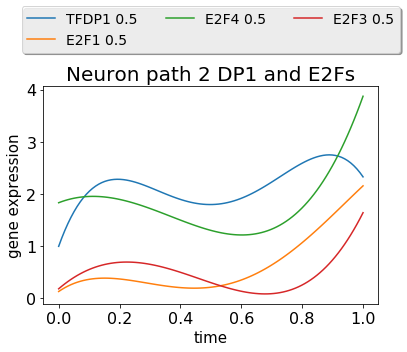

loading model from file:  neuron_developmental_TF_v7_it10.pickle
loading data......
252  cell loaded with  11835  genes selected
path:  6
selecting genes:  sox4	sox8	sox11	sox12	tcf7l2
TF:  sox4
TF:  sox8
TF:  sox11
TF:  sox12
TF:  tcf7l2


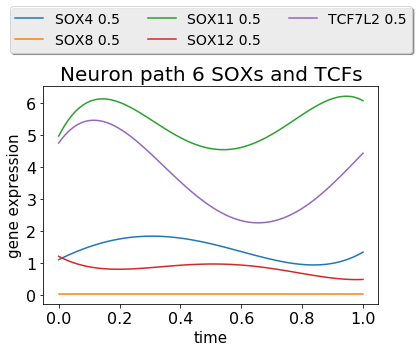

loading model from file:  neuron_developmental_TF_v7_it10.pickle
loading data......
252  cell loaded with  11835  genes selected
path:  7
selecting genes:  atf3	fos
TF:  atf3
TF:  fos


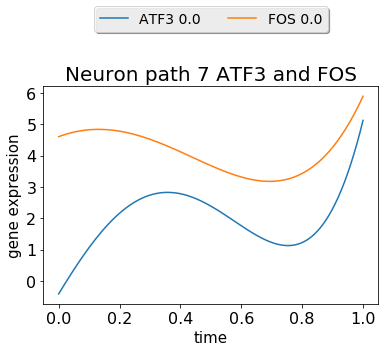

In [6]:
# plot selected TF expressions for Neuron dataset
data_file="treutlein2016-2"
model_file = "neuron_developmental_TF_v7_it10.pickle"

ANA.plot_cont_TF(model_file,data_file,select=[[1],"jun","fos"],title="Neuron path 1 JUN and FOS")
ANA.plot_cont_TF(model_file,data_file,select=[[1],"jun","fosl1"],title="Neuron path 1 JUN and FOSL1")
ANA.plot_cont_TF(model_file,data_file,select=[[2],"tfdp1","e2f1","e2f4","e2f3"],title="Neuron path 2 DP1 and E2Fs")
ANA.plot_cont_TF(model_file,data_file,select=[[6],"sox4","sox8","sox11","sox12","tcf7l2"],title="Neuron path 6 SOXs and TCFs")
ANA.plot_cont_TF(model_file,data_file,select=[[7],"atf3","fos"],title="Neuron path 7 ATF3 and FOS")

In [7]:
# searching tf interactions on TcoF DBv2 for lung dataset
data_file="treutlein2014"
model_file = "lung_developmental_TF_v7_it10.pickle"
ANA.calc_TcoF_DB_pval(model_file,data_file,out_folder='TF_analysis_result',calc_all_interaction=False)
# if you set calc_all_interaction=True, it will search all the 32896 combinations of TF pairs and will be time consuming,
# if you run this setting, you will get that among 32896 combinations you have 960 interactions on the database.
# note that you need to have a folder named "TF_analysis_result" first so that it will store the search result in that folder
# this folder can be changed by changing the out_folder argement

loading model from file:  lung_developmental_TF_v7_it10.pickle
loading data......
152  cell loaded with  15174  genes selected
# of all tfs in gene names:  257
path:  0
early tfs:  []
late tfs:  []
searh TcoF DB all interactions
#combinations:  0
all interaction:  0
searh TcoF DB early interactions
#combinations:  0
early interaction:  0
searh TcoF DB late interactions
#combinations:  0
late interaction:  0
path:  1
early tfs:  ['yy1', 'e2f4', 'atf2', 'e2f1', 'e2f3', 'xbp1']
late tfs:  ['creb1', 'atf7', 'crem', 'dsp']
searh TcoF DB all interactions
#combinations:  45
all interaction:  5
searh TcoF DB early interactions
#combinations:  15
early interaction:  1
searh TcoF DB late interactions
#combinations:  6
late interaction:  1
path:  2
early tfs:  ['cebpd', 'sox9', 'cebpb', 'e2f1', 'klf12', 'sox5', 'sox4']
late tfs:  ['nrf1', 'tcf7l2', 'bach2']
searh TcoF DB all interactions
#combinations:  45
all interaction:  4
searh TcoF DB early interactions
#combinations:  21
early interaction: 

In [8]:
#calculate p-values using hyper geometric distribution based on the number obtained from previous step:
print hypergeom.sf(30,32896,960,315)
print hypergeom.sf(8,32896,960,119)
print hypergeom.sf(5,32896,960,47)
print hypergeom.sf(17,32896,960,149)

4.563327322219783e-09
0.008242535634599374
0.002353313685329838
3.9050183945551347e-07
